In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

### Маятник – тело с массой 0.4 кг, моментом инерции относительно оси 0.06 кг∙м2, центр его тяжести находится на расстоянии a м от оси, трения нет;

Это значит, что I = M*L^2 -> L = sqrt(I / M) = 0.38м

In [2]:
In = 0.06
M = 0.4
dT = 0.1
g = 9.81
L = 0.38
TotalTime = 10
Tin = np.linspace(0, TotalTime, TotalTime/dT + 1)
Tin

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [3]:
sys_tf = signal.TransferFunction([1], [In, 0, -L * M * g])
print(sys_tf)

TransferFunctionContinuous(
array([16.66666667]),
array([  1.   ,   0.   , -24.852]),
dt: None
)


### Представьте систему с помощью уравнения состояния. Проинтерпретируйте переменные состояния.

In [4]:
sys_tf = signal.tf2ss([1], [In, 0, -L * M * g])
print(sys_tf)

(array([[-0.   , 24.852],
       [ 1.   ,  0.   ]]), array([[1.],
       [0.]]), array([[ 0.        , 16.66666667]]), array([[0.]]))


#### d(z1) / d(t) = 24.8z2 + M and d(z2) / d(t) = z1 and theta = 16.(6)z2

### Промоделируйте свободное (т.е. без включения двигателя) движение маятника из малого ненулевого угла. Упадёт ли при этом маятник?

In [5]:
def plotting (sys):
    axes = plt.gca()
    axes.set_ylim([-0.4, 8])
    axes.set_xlim([0, 10])
    zero_input = np.zeros(Tin.shape)
    start_pos = 1 / 180.0 * np.pi
    Tout,yout,xout = signal.lsim(sys, zero_input, Tin, X0=[0, start_pos/40])
    axes = plt.plot(Tout, yout, 'b')
    limit = 15 / 180.0 * np.pi
    axes = plt.plot([0, TotalTime], [limit, limit], 'r')
    axes = plt.plot([0, TotalTime], [-limit, -limit], 'r')
    plt.show()

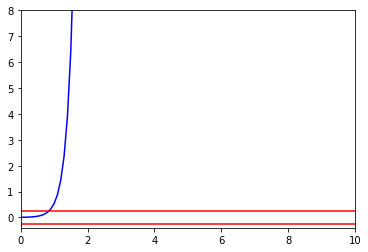

In [6]:
plotting(sys_tf)

### Добавьте в систему PID-регулятор. Проинтерпретируйте изменения в уравнении состояния.

In [7]:
def PID (P, I, D):
    PID_num = [D, P, I]
    PID_den = [1, 0]
    interm_num = np.convolve([1], PID_num)
    interm_den = np.convolve([In, 0, -M*g*L], PID_den)
    total_sys = signal.tf2ss(interm_den, np.polyadd(interm_den, interm_num))
    return total_sys

In [8]:
#plotting(total_sys)   
total_sys = PID(1, 0, 0)  #теперь это ОК
print(total_sys)          

(array([[-0.        ,  8.18533333, -0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ]]), array([[1.],
       [0.],
       [0.]]), array([[  0.        , -16.66666667,   0.        ]]), array([[1.]]))


In [9]:
zero_input = np.zeros(Tin.shape)
start_pos = 1 / 180 * np.pi
total_sys = PID(1,0,0)  # ошибка cannot copy sequence with size 2 to array axis with dimension 3
Tout,yout,xout = signal.lsim(total_sys, zero_input, Tin, X0=[0., start_pos/40])

ValueError: cannot copy sequence with size 2 to array axis with dimension 3

In [10]:
Tout,yout,xout = signal.lsim(total_sys, zero_input, Tin, X0=[0., start_pos/40, 0]) 
yout  # при добавлении третьего параметра в Х0 выдаются какие-то разумные результаты

array([-7.27220522e-03, -7.57186803e-03, -8.49555264e-03, -1.01193828e-02,
       -1.25771837e-02, -1.60715103e-02, -2.08903414e-02, -2.74308121e-02,
       -3.62319435e-02, -4.80190650e-02, -6.37635908e-02, -8.47630775e-02,
       -1.12748160e-01, -1.50025177e-01, -1.99666249e-01, -2.65762452e-01,
       -3.53760987e-01, -4.70914093e-01, -6.26876732e-01, -8.34502282e-01,
       -1.11090183e+00, -1.47885433e+00, -1.96868394e+00, -2.62075908e+00,
       -3.48881932e+00, -4.64440430e+00, -6.18274945e+00, -8.23063470e+00,
       -1.09568328e+01, -1.45860185e+01, -1.94172844e+01, -2.58487907e+01,
       -3.44105783e+01, -4.58082514e+01, -6.09811286e+01, -8.11796551e+01,
       -1.08068456e+02, -1.43863523e+02, -1.91514842e+02, -2.54949509e+02,
       -3.39395379e+02, -4.51811905e+02, -6.01463691e+02, -8.00684018e+02,
       -1.06589127e+03, -1.41894202e+03, -1.88893231e+03, -2.51459553e+03,
       -3.34749460e+03, -4.45627137e+03, -5.93230367e+03, -7.89723605e+03,
       -1.05130048e+04, -